### Import

In [1]:
import numpy as np
import functions_eq_mag as fc
import functions_fatiando as ft
from timeit import default_timer as time
from scipy.interpolate import griddata
from scipy import interpolate, signal
import pickle as pickle
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib import gridspec
%matplotlib inline

### Observed Grid and Data

In [2]:
with open('synthetic_regular_tf.pickle', 'rb') as r:
    synthetic_regular_tf = pickle.load(r)

with open('synthetic_irregular_20_tf.pickle', 'rb') as r:
    synthetic_irregular_20_tf = pickle.load(r)

with open('synthetic_irregular_30_tf.pickle', 'rb') as r:
    synthetic_irregular_30_tf = pickle.load(r)

with open('synthetic_irregular_z05_tf.pickle', 'rb') as r:
    synthetic_irregular_z05_tf = pickle.load(r)

with open('synthetic_irregular_z10_tf.pickle', 'rb') as r:
    synthetic_irregular_z10_tf = pickle.load(r)

In [3]:
xi_plot = synthetic_regular_tf['x']
yi_plot = synthetic_regular_tf['y']
zi = synthetic_regular_tf['z']
tf = synthetic_regular_tf['tf']
shape = (100, 50)
N = shape[0]*shape[1]

In [4]:
scale_max1 = np.max(synthetic_irregular_z10_tf['tf'])
scale_min1 = np.min(synthetic_irregular_z10_tf['tf'])
print (scale_min1, scale_max1)
scale_max1 = 27.
scale_min1 = -73.

-72.24771485806443 26.707800945380452


In [5]:
scale_max2 = np.max(synthetic_irregular_30_tf['tf_up'])
scale_min2 = np.min(synthetic_irregular_30_tf['tf_up'])
print (scale_min2, scale_max2)
scale_max2 = 12.
scale_min2 = -40.

-39.1556275157547 11.833278380330272


### Plot of the Figure 1 synthetic data

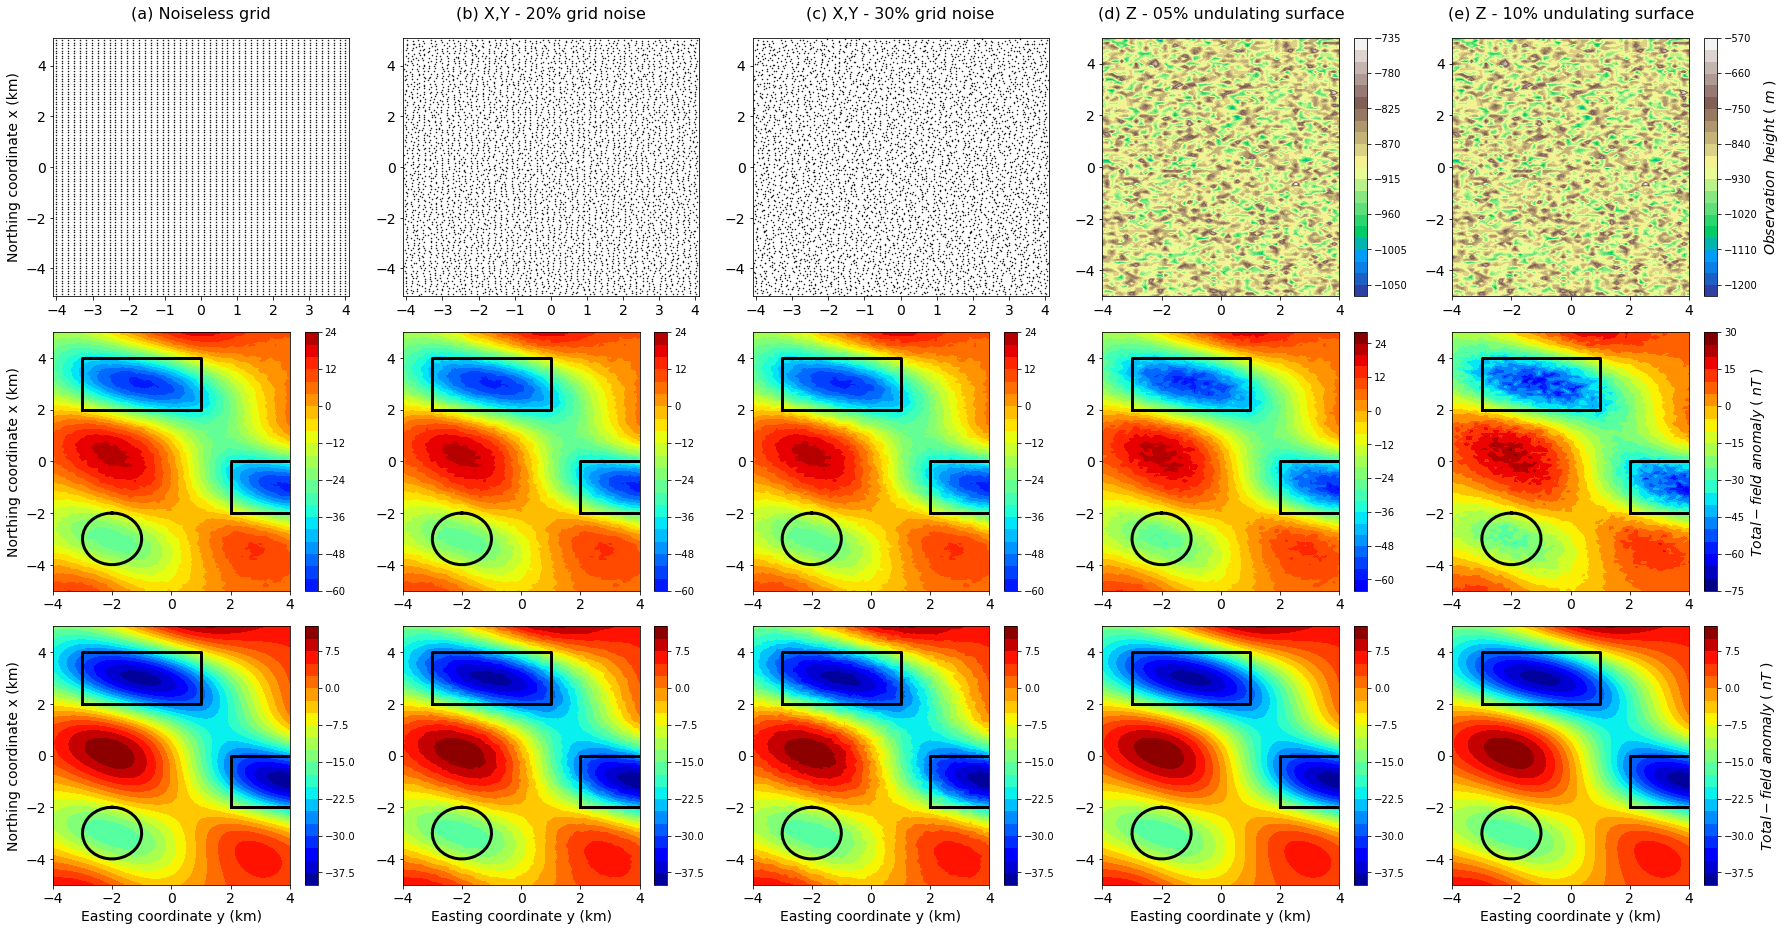

In [20]:
#Projection_model 
R = 1000 #Radius
xc, yc, zc = -3000.,-2000.,2000. #Center of sphere
phi = np.linspace(0, 2.*np.pi, 36)  #36 points
x = xc/1000 + R/1000*np.cos(phi)
y = yc/1000 + R/1000*np.sin(phi)

x_p = [-3., -3, 1, 1, -3.]
y_p = [2., 4, 4, 2, 2.]

x_p2 = [2, 2, 6, 6, 2]
y_p2 = [-2, 0, 0, -2, -2.]

fig = plt.figure(figsize=(25,13))
fig.patch.set_facecolor('xkcd:white')

plt.subplot(351)
plt.title('(a) Noiseless grid', y=1.05, x=0.5, fontsize=16)
plt.plot(synthetic_regular_tf['y'], synthetic_regular_tf['x'], 'ko', alpha=1, ms=0.5)
#plt.plot(x_p,y_p,color="k", linewidth=3)
#plt.plot(x_p2,y_p2,color="k", linewidth=3)
#plt.plot(y, x, color="k", linewidth=3)
#cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot)-0.1,np.max(yi_plot)+0.1)
plt.ylim(np.min(xi_plot)-0.1,np.max(xi_plot)+0.1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(356)
#plt.title('(b)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_regular_tf['tf'],22,vmin=scale_min1, vmax=scale_max1,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(3,5,11)
#plt.title('(c)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_regular_tf['tf_up'],22,vmin=scale_min2, vmax=scale_max2,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Total-field \,\, anomaly$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(352)
plt.title('(b) X,Y - 20% grid noise', y=1.05, x=0.5, fontsize=16)
plt.plot(synthetic_irregular_20_tf['y'], synthetic_irregular_20_tf['x'], 'ko', alpha=1, ms=0.5)
#plt.plot(x_p,y_p,color="k", linewidth=3)
#plt.plot(x_p2,y_p2,color="k", linewidth=3)
#plt.plot(y, x, color="k", linewidth=3)
#cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot)-0.1,np.max(yi_plot)+0.1)
plt.ylim(np.min(xi_plot)-0.1,np.max(xi_plot)+0.1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(357)
#plt.title('(e)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_20_tf['tf'],22,vmin=scale_min1, vmax=scale_max1,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(3,5,12)
#plt.title('(f)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_20_tf['tf_up'],22,vmin=scale_min2, vmax=scale_max2,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Total-field \,\, anomaly$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(353)
plt.title('(c) X,Y - 30% grid noise', y=1.05, x=0.5, fontsize=16)
plt.plot(synthetic_irregular_30_tf['y'], synthetic_irregular_30_tf['x'], 'ko', alpha=1, ms=0.5)
#plt.plot(y, x, color="k", linewidth=3)
#cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot)-0.1,np.max(yi_plot)+0.1)
plt.ylim(np.min(xi_plot)-0.1,np.max(xi_plot)+0.1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(358)
#plt.title('(h)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_30_tf['tf'],22,vmin=scale_min1, vmax=scale_max1,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(3,5,13)
#plt.title('(i)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_30_tf['tf_up'],22,vmin=scale_min2, vmax=scale_max2,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Total-field \,\, anomaly$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(3,5,4)
plt.title('(d) Z - 05% undulating surface', y=1.05, x=0.5, fontsize=16)
plt.tricontourf(synthetic_irregular_z05_tf['y'], synthetic_irregular_z05_tf['x'],synthetic_irregular_z05_tf['z'],22,cmap='terrain')
#plt.plot(x_p,y_p,color="k", linewidth=3)
#plt.plot(x_p2,y_p2,color="k", linewidth=3)
#plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Observation \,\,\, height$ ( $m$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(3,5,9)
#plt.title('(k)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z05_tf['tf'],22,vmin=scale_min1, vmax=scale_max1,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(3,5,14)
#plt.title('(l)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z05_tf['tf_up'],22,vmin=scale_min2, vmax=scale_max2,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Total-field \,\, anomaly$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(3,5,5)
plt.title('(e) Z - 10% undulating surface', y=1.05, x=0.5, fontsize=16)
plt.tricontourf(synthetic_irregular_z10_tf['y'], synthetic_irregular_z10_tf['x'],synthetic_irregular_z10_tf['z'],22,cmap='terrain')
#plt.plot(x_p,y_p,color="k", linewidth=3)
#plt.plot(x_p2,y_p2,color="k", linewidth=3)
#plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
cb.set_label('$Observation \,\,\, height$ ( $m$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(3,5,10)
#plt.title('(n)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z10_tf['tf'],22,vmin=scale_min1, vmax=scale_max1,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
cb.set_label('$Total-field \,\, anomaly$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(3,5,15)
#plt.title('(o)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z10_tf['tf_up'],22,vmin=scale_min2, vmax=scale_max2,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
cb.set_label('$Total-field \,\, anomaly$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.tight_layout()
#plt.savefig('figures/synthetic_data_comparison_v2.png', dpi=300)